<a href="https://colab.research.google.com/github/tohajan/datasci/blob/main/depression_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model predicting depression using Decision Tree Classifier

In [ ]:
# import libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
# load in the data
depression = pd.read_stata("C:/Users/tohaj/Box/Programming/DataScience/DATA SETS/Depression/depression_data.dta")

In [ ]:
depression.head(10)

,Nativity,Depression,Age,Gender,Education,Income,Marital,Health,Insurance,CitySize,Citizenship,Race,Region
0,native-born,No,85,Male,4,8.75,Currently Married,4,Insured,2,Citizen,White,South
1,native-born,No,39,Male,4,6.25,Currently not married,4,Insured,2,Citizen,White,South
2,native-born,No,42,Male,3,8.75,Currently not married,3,Insured,2,Citizen,Black,South
3,native-born,No,32,Male,6,6.25,Currently not married,5,Insured,2,Citizen,Hispanic,South
4,native-born,Yes,85,Female,3,3.75,Currently not married,3,Insured,2,Citizen,White,South
5,native-born,Yes,70,Female,6,3.75,Currently not married,2,Insured,2,Citizen,White,South
6,native-born,No,32,Female,6,3.75,Currently Married,4,Insured,2,Citizen,White,South
7,native-born,No,77,Female,3,1.25,Currently not married,2,Insured,3,Citizen,Black,South
8,native-born,No,71,Male,5,3.75,Currently Married,4,Insured,3,Citizen,Black,South
9,native-born,Yes,69,Female,5,8.75,Currently Married,3,Insured,3,Citizen,White,South


In [ ]:
depression_all = depression.drop(['Nativity', 'Citizenship'], axis = 1)

In [ ]:
depression_all.head()

,Depression,Age,Gender,Education,Income,Marital,Health,Insurance,CitySize,Race,Region
0,No,85,Male,4,8.75,Currently Married,4,Insured,2,White,South
1,No,39,Male,4,6.25,Currently not married,4,Insured,2,White,South
2,No,42,Male,3,8.75,Currently not married,3,Insured,2,Black,South
3,No,32,Male,6,6.25,Currently not married,5,Insured,2,Hispanic,South
4,Yes,85,Female,3,3.75,Currently not married,3,Insured,2,White,South


In [ ]:
# number of cases
depression_all.shape[0]

30145

In [ ]:
# dummy recode categorical IVs
cats = {'Gender', 'Marital', 'Insurance', 'Race', 'Region'}
depression_recode = pd.get_dummies(data = depression_all, columns = cats, prefix = 'dum', prefix_sep = '_', drop_first = True)
depression_recode.head()

C:\Users\tohaj\AppData\Local\Temp\ipykernel_29952\777146118.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  depression_recode = pd.get_dummies(data = depression_all, columns = cats, prefix = 'dum', prefix_sep = '_', drop_first = True)


,Depression,Age,Education,Income,Health,CitySize,dum_White,dum_Black,dum_Asian,dum_Others,dum_Currently Married,dum_Male,dum_MWest,dum_South,dum_West,dum_Insured
0,No,85,4,8.75,4,2,1,0,0,0,1,1,0,1,0,1
1,No,39,4,6.25,4,2,1,0,0,0,0,1,0,1,0,1
2,No,42,3,8.75,3,2,0,1,0,0,0,1,0,1,0,1
3,No,32,6,6.25,5,2,0,0,0,0,0,1,0,1,0,1
4,Yes,85,3,3.75,3,2,1,0,0,0,0,0,0,1,0,1


In [ ]:
depression_recode.head()

,Depression,Age,Education,Income,Health,CitySize,dum_White,dum_Black,dum_Asian,dum_Others,dum_Currently Married,dum_Male,dum_MWest,dum_South,dum_West,dum_Insured
0,No,85,4,8.75,4,2,1,0,0,0,1,1,0,1,0,1
1,No,39,4,6.25,4,2,1,0,0,0,0,1,0,1,0,1
2,No,42,3,8.75,3,2,0,1,0,0,0,1,0,1,0,1
3,No,32,6,6.25,5,2,0,0,0,0,0,1,0,1,0,1
4,Yes,85,3,3.75,3,2,1,0,0,0,0,0,0,1,0,1


In [ ]:
# separate IVs from DV
X = depression_recode.drop('Depression', axis = 1)
y = depression_recode['Depression']

In [ ]:
X.head()

,Age,Education,Income,Health,CitySize,dum_White,dum_Black,dum_Asian,dum_Others,dum_Currently Married,dum_Male,dum_MWest,dum_South,dum_West,dum_Insured
0,85,4,8.75,4,2,1,0,0,0,1,1,0,1,0,1
1,39,4,6.25,4,2,1,0,0,0,0,1,0,1,0,1
2,42,3,8.75,3,2,0,1,0,0,0,1,0,1,0,1
3,32,6,6.25,5,2,0,0,0,0,0,1,0,1,0,1
4,85,3,3.75,3,2,1,0,0,0,0,0,0,1,0,1


In [ ]:
y.head()

0     No
1     No
2     No
3     No
4    Yes
Name: Depression, dtype: category
Categories (2, object): ['No' < 'Yes']

In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23, train_size = 0.7)

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# use the model to predict test data
y_pred = model.predict(X_test)

In [ ]:
# For comparison, put predicted y and actual y side by side in a table
y_pred = pd.Series(y_pred)

y_test = y_test.reset_index(drop = True)
z = pd.concat([y_pred, y_test], axis = 1)
z.columns = ['Actual', 'Predicted']
z.head(10)

,Actual,Predicted
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
5,No,No
6,No,No
7,No,No
8,Yes,No
9,No,No


In [ ]:
# Evaluate the entire dataset
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

print('R_squared:', model.score(X_test, y_test)) # same as accuracy above

Accuracy: 0.7337461300309598
R_squared: 0.7337461300309598


73% accuracy

## Confusion Matrix

Text(0.5, 15.0, 'Predicted')

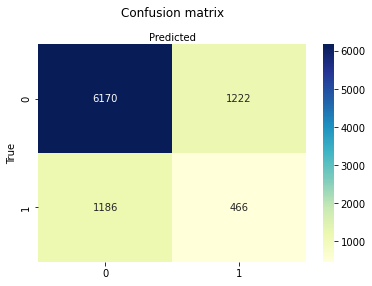

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')